# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [72]:
# list of dictionaries to make df when done with loop
city_list = []

# variables for print log
set_num = 1
record_num = 1
city_count = 1

print('''Beginning Data Retrieval
-----------------------------''')
#looping through the cities
for i in range(len(cities)):
    # sending API call and getting json
    url = f"http://api.openweathermap.org/data/2.5/weather?q={cities[i]}&units=imperial&appid={weather_api_key}"
    weather_response = requests.get(url)
    weather_response_json = weather_response.json()

    # resetting my variables for the print log
    if not city_count <= 50:
        set_num += 1
        city_count = 0
        record_num = 0
    # using try except to add cities to database
    try: 
        city_lat = weather_response_json['coord']['lat']
        city_lon = weather_response_json['coord']['lon']
        max_temp = weather_response_json["main"]["temp_max"]
        humidity = weather_response_json["main"]["humidity"]
        cloudiness = weather_response_json["clouds"]["all"]
        wind_speed = weather_response_json["wind"]["speed"]
        country = weather_response_json["sys"]["country"]
        date = weather_response_json["dt"]
    
        city_list.append({
            'City': cities[i], 
            'Lat' : city_lat,
            'Lng' : city_lon,
            'Max Temp': max_temp,
            'Humidity' : humidity,
            'Cloudiness' : cloudiness,
            'Wind Speed' : wind_speed,
            'Country' : country,
            'Date' : date
        })
        
        print(f"Processing Record {record_num} of Set {set_num} | {cities[i]}")
        city_count += 1
        record_num += 1
    except:
        print("City not found. Skipping...")
        pass
print('''-----------------------------
Data Retrieval Complete
-----------------------------''')

temps_df = pd.DataFrame(city_list)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | erzin
Processing Record 3 of Set 1 | montrose
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | bahia blanca
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | mindelo
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | batagay-alyta
City not found. Skipping...
Processing Record 12 of Set 1 | porto santo
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | beringovskiy
Processing Record 15 of Set 1 | ingham
Processing Record 16 of Set 1 | lugoba
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | saint anthony
Processing Record 19 of Set 1 | matara
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | kushima
Processing R

Processing Record 35 of Set 4 | talnakh
Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | mildura
Processing Record 38 of Set 4 | nongan
Processing Record 39 of Set 4 | husavik
Processing Record 40 of Set 4 | yulara
Processing Record 41 of Set 4 | kaminskiy
Processing Record 42 of Set 4 | punta de bombon
Processing Record 43 of Set 4 | khani
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | vanimo
Processing Record 47 of Set 4 | aswan
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | marzuq
Processing Record 50 of Set 4 | nantucket
Processing Record 0 of Set 5 | morrope
Processing Record 1 of Set 5 | ponta do sol
City not found. Skipping...
Processing Record 2 of Set 5 | lata
Processing Record 3 of Set 5 | pangkalanbuun
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | burley
Processing Record 6 of Set 5 | santa fe
Processing Record 7 of Set 5 | 

Processing Record 23 of Set 8 | taoudenni
Processing Record 24 of Set 8 | uvaly
Processing Record 25 of Set 8 | santa maria
Processing Record 26 of Set 8 | khujner
City not found. Skipping...
Processing Record 27 of Set 8 | cumpana
Processing Record 28 of Set 8 | coos bay
Processing Record 29 of Set 8 | youkounkoun
Processing Record 30 of Set 8 | shieli
Processing Record 31 of Set 8 | morondava
Processing Record 32 of Set 8 | marsh harbour
Processing Record 33 of Set 8 | cabedelo
City not found. Skipping...
Processing Record 34 of Set 8 | warrnambool
Processing Record 35 of Set 8 | el tigre
City not found. Skipping...
Processing Record 36 of Set 8 | simoes
Processing Record 37 of Set 8 | farmington
Processing Record 38 of Set 8 | okha
Processing Record 39 of Set 8 | khuchni
Processing Record 40 of Set 8 | kulhudhuffushi
Processing Record 41 of Set 8 | san miguel
Processing Record 42 of Set 8 | eyrarbakki
Processing Record 43 of Set 8 | emerald
Processing Record 44 of Set 8 | mbuyapey
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
temps_df.to_csv('weather_export.csv')
temps_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faanui,-16.48,-151.75,80.08,72,4,11.39,PF,1607898555
1,erzin,36.96,36.20,59.00,65,100,5.01,TR,1607898555
2,montrose,38.42,-108.27,25.00,57,31,3.00,US,1607898556
3,thompson,55.74,-97.86,-14.80,75,20,5.82,CA,1607898556
4,bahia blanca,-38.72,-62.27,73.81,21,6,7.78,AR,1607898552
...,...,...,...,...,...,...,...,...,...
547,narsimhapur,22.95,79.20,64.26,72,61,4.07,IN,1607898649
548,kuala lipis,4.18,102.05,70.75,95,99,0.72,MY,1607898649
549,southbridge,42.08,-72.03,48.99,74,92,6.60,US,1607898649
550,san cristobal,7.77,-72.22,84.20,62,20,9.17,VE,1607898476


In [75]:
temps_summary = temps_df.describe()
temps_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.055290,20.812754,50.124638,74.697464,56.764493,8.399692,1.607899e+09
std,33.692567,93.083648,31.308794,19.130864,38.642561,6.655843,6.635245e+01
min,-54.800000,-175.200000,-54.270000,11.000000,0.000000,0.310000,1.607898e+09
25%,-6.990000,-65.392500,30.200000,66.000000,20.000000,3.360000,1.607899e+09
50%,23.740000,24.190000,60.200000,79.000000,75.000000,6.875000,1.607899e+09
75%,47.852500,109.827500,75.217500,88.000000,91.250000,11.395000,1.607899e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,44.830000,1.607899e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
# no cities have a humidity greater than 100, skipped this

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

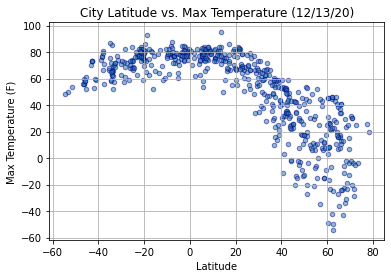

In [173]:
lat_temp_plot = temps_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, alpha=.5, edgecolors='navy')
lat_temp_plot.set_ylabel("Max Temperature (F)")
lat_temp_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (12/13/20)")
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/LatitudeMaxTempScatter.png")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (12/13/20)')

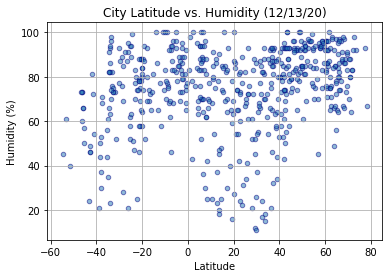

In [101]:
lat_hum_plot = temps_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, alpha=.5, edgecolors='navy')
lat_hum_plot.set_ylabel("Humidity (%)")
lat_hum_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Humidity (12/13/20)")
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/LatitudeHumidityScatter.png")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (12/13/20)')

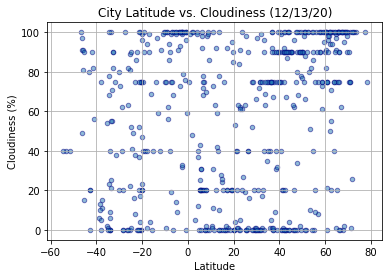

In [102]:
lat_cloud_plot = temps_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, alpha=.5, edgecolors='navy')
lat_cloud_plot.set_ylabel("Cloudiness (%)")
lat_cloud_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (12/13/20)")
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/LatitudeCloudinessScatter.png")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (12/13/20)')

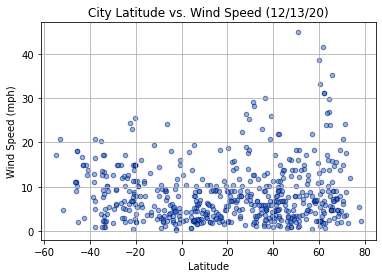

In [103]:
lat_wind_plot = temps_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, alpha=.5, edgecolors='navy')
lat_wind_plot.set_ylabel("Wind Speed (mph)")
lat_wind_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (12/13/20)")
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/LatitudeWindSpeedScatter.png")

## Linear Regression

In [161]:
temps_df['Hemisphere'] = ["Northern" if x > 0  else "Southern" for x in temps_df['Lat']]
north_temps_df = temps_df[temps_df["Hemisphere"] == "Northern"]
south_temps_df = temps_df[temps_df["Hemisphere"] == "Southern"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.660352119897338


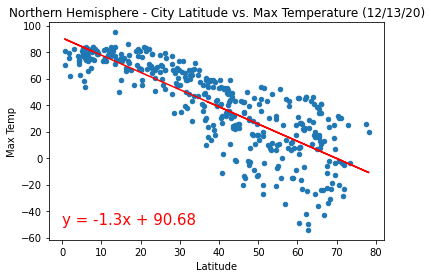

In [162]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Max Temp")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/NorthernLatitudeMaxTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.31247197382408715


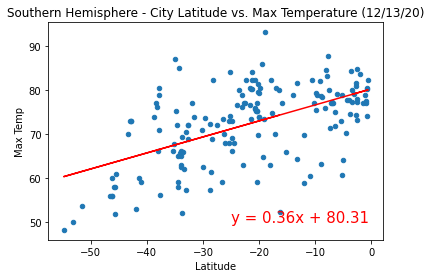

In [163]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Max Temp")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/SouthernLatitudeMaxTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09877917837038172


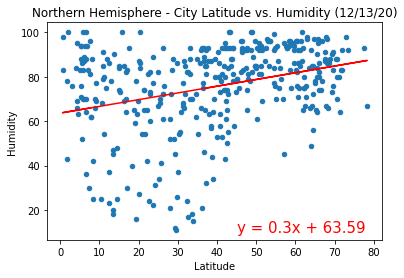

In [164]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Humidity")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/NorthernLatitudeHumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1908678848142235


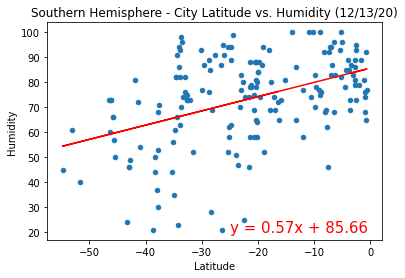

In [165]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Humidity")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/SouthernLatitudeHumidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1482094457640839


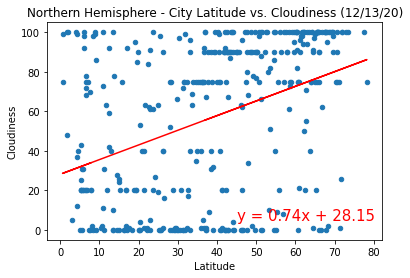

In [166]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Cloudiness")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/NorthernLatitudeCloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10421685897505388


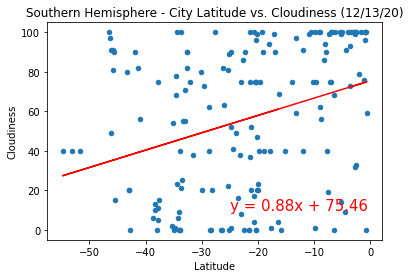

In [167]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Cloudiness")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/SouthernLatitudeCloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03814557974123626


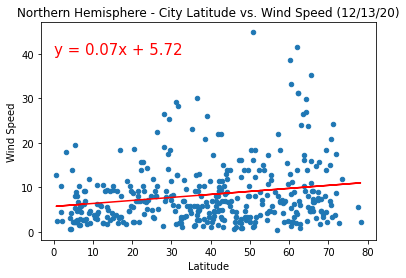

In [168]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Wind Speed")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("C:/Users/Mary/Documents/WashU_Data_Analytics/Homework/Python API/python-api-challenge/starter_code/weather_pngs/SouthernLatitudeWindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07737336009403228


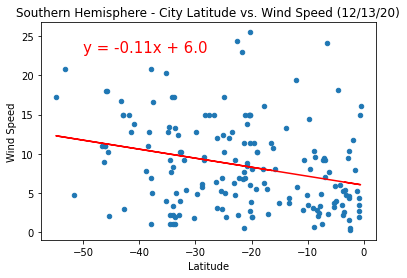

In [169]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Wind Speed")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()